# Unsupervised Learning: Myopia
## Contributor: Sam Espe

### Set Up

In [1]:
# Avoid memory leak

import os
os.environ["OMP_NUM_THREADS"] = '1'

In [2]:
# Import dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

### Part 1: Prepare the data

In [3]:
# Read in the file

file_path = 'myopia.csv'

myopia_df = pd.read_csv(file_path)
myopia_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [4]:
# Remove MYOPIC column

myopia_no_answers = myopia_df.drop(columns = "MYOPIC")

In [5]:
# Create and apply a scaler

scaler = StandardScaler()
myopia_scaled = scaler.fit_transform(myopia_no_answers)

### Dimensionality Reduction

In [6]:
# Initialize the PCA model for dimensionality reduction, preserving about 90% of the explained variance

pca = PCA(n_components=0.90)

In [7]:
# Fit the PCA model to the data set, transform the data set

myopia_PCA = pca.fit_transform(myopia_scaled)

In [8]:
# Find the principal dimensions from the PCA model
myopia_PCA_df = pd.DataFrame(myopia_PCA)
myopia_PCA_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [9]:
# Add names to the columns
myopia_PCA_df = myopia_PCA_df.rename(columns = {0: "Pri_Component_1", 1: "Pri_Comp_2", 2: "Pri_Comp_3", 3: "Pri_Comp_4", 4: "Pri_Comp_5", 5: "Pri_Comp_6", 6: "Pri_Comp_7", 7: "Pri_Comp_8", 8: "Pri_Comp_9", 9: "Pri_Comp_10"})
myopia_PCA_df

,Pri_Component_1,Pri_Comp_2,Pri_Comp_3,Pri_Comp_4,Pri_Comp_5,Pri_Comp_6,Pri_Comp_7,Pri_Comp_8,Pri_Comp_9,Pri_Comp_10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183
...,...,...,...,...,...,...,...,...,...,...
613,-0.237547,1.146547,-1.546054,-0.248834,2.326683,-0.202403,0.084104,0.705501,-0.854993,0.736996
614,-0.649011,-1.796952,-0.823592,0.564878,0.134282,0.348639,-0.174354,0.252875,1.022202,-0.544105
615,-0.890082,-2.308005,0.268102,0.262770,0.231606,0.566061,-0.328287,-0.489877,1.822691,0.081777
616,-1.124000,0.451890,0.001659,-0.847089,-0.143347,-0.414353,-0.448120,0.239685,-1.592822,-1.014581


In [10]:
# Reduce dimensions further with t-SNE

tsne = TSNE(learning_rate=25, init = 'pca', random_state=42)
myopia_tsne = tsne.fit_transform(myopia_PCA_df)

C:\Users\itssm\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [11]:
tsne_df = pd.DataFrame()
tsne_df["x"] = myopia_tsne[:,0]
tsne_df["y"] = myopia_tsne[:,1]

tsne_df

,x,y
0,2.818987,-10.092710
1,18.468901,16.743258
2,-11.847575,-6.760570
3,-13.581324,2.666353
4,16.109316,1.810576
...,...,...
613,-1.054480,-20.125061
614,18.925236,16.419809
615,20.692450,16.471048
616,-25.666998,-5.805001


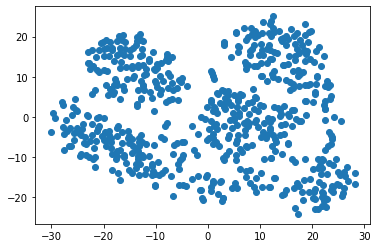

In [12]:
# Create scatter plot of t-SNE results

plt.scatter(tsne_df['x'], tsne_df['y'])
plt.show()

It looks like there might be two shown in the graph of the t-SNE results. I would call the blob in the upper left one cluster, with the rest being another cluster. I inserted an image below illustrating the two clusters I think I see. The clusters aren't very distinct though, so it would be easy to argue that there are more than two clusters, or someone else could draw the clusters differently.

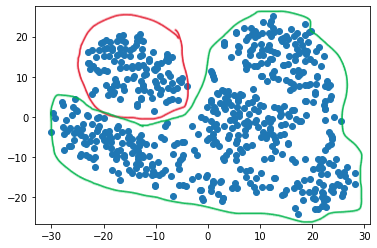

### K-Means Cluster Analysis

In [13]:
# Create an elbow graph to find the best value of k

inertia = []
k = list(range(1,11))

for i in k:
    km = KMeans(n_clusters=i, random_state = 13)
    km.fit(tsne_df)
    inertia.append(km.inertia_)

In [14]:
elbow = {"k":k, "inertia":inertia}
elbow_df = pd.DataFrame(elbow)
elbow_df

,k,inertia
0,1,238887.531250
1,2,122309.250000
2,3,76829.367188
3,4,54035.503906
4,5,39550.855469
5,6,30797.662109
6,7,26048.777344
7,8,22056.033203
8,9,19451.683594
9,10,17388.896484


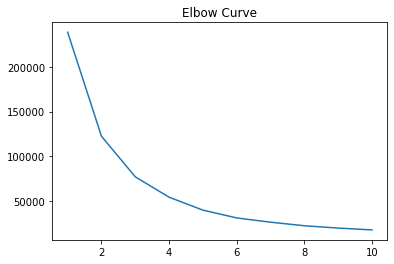

In [15]:
plt.plot(elbow_df["k"], elbow_df["inertia"])
plt.title("Elbow Curve")
plt.show()

It looks like the elbow happens around k=3 or 4; the elbow isn't very clear, though.

In [16]:
# Evaluate data using best value of k

km_model = KMeans(n_clusters=4, random_state=13)

km_model.fit(tsne_df)

KMeans(n_clusters=4, random_state=13)

In [17]:
km_predictions = km_model.predict(tsne_df)
tsne_df["class"] = km_model.labels_
tsne_df

,x,y,class
0,2.818987,-10.092710,0
1,18.468901,16.743258,2
2,-11.847575,-6.760570,1
3,-13.581324,2.666353,3
4,16.109316,1.810576,2
...,...,...,...
613,-1.054480,-20.125061,0
614,18.925236,16.419809,2
615,20.692450,16.471048,2
616,-25.666998,-5.805001,1


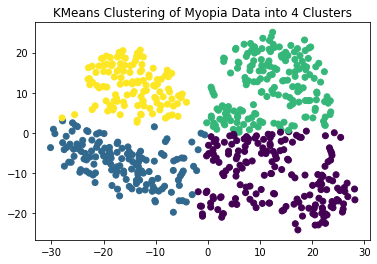

In [18]:
# Graph clusters

plt.scatter(tsne_df["x"], tsne_df["y"], c = tsne_df["class"])
plt.title("KMeans Clustering of Myopia Data into 4 Clusters")
plt.show()

In [19]:
# Seeing what the version with 3 clusters looks like

km_model = KMeans(n_clusters=3, random_state=13)

km_model.fit(tsne_df)

KMeans(n_clusters=3, random_state=13)

In [20]:
km_predictions = km_model.predict(tsne_df)
tsne_df["class"] = km_model.labels_
tsne_df

,x,y,class
0,2.818987,-10.092710,1
1,18.468901,16.743258,2
2,-11.847575,-6.760570,0
3,-13.581324,2.666353,0
4,16.109316,1.810576,2
...,...,...,...
613,-1.054480,-20.125061,1
614,18.925236,16.419809,2
615,20.692450,16.471048,2
616,-25.666998,-5.805001,0


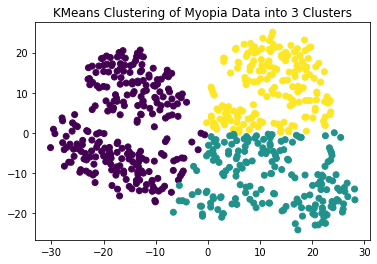

In [21]:
# Graph clusters

plt.scatter(tsne_df["x"], tsne_df["y"], c = tsne_df["class"])
plt.title("KMeans Clustering of Myopia Data into 3 Clusters")
plt.show()

### Conclusions

It's really hard to tell if the myopia data set has distinct clusters. When creating the elbow graph to find the best value of k for the K-Means clustering, the elbow wasn't very clear - it looked to be around 3 or 4 clusters. I performed the K-Means clustering with both 3 and 4 clusters. I think the model with 4 clusters looks like it fits a little better than the one with 3 clusters. Regardless, the clusters aren't very clearly delineated, and one could argue about the number of clusters present and their significance. I would be interested to see if more data would make the clusters clearer, but as it stands, I'd say that the clustering is fairly weak.